<a href="https://colab.research.google.com/github/yeojeong735/25-BDA-TeamDP/blob/main/25_BDA_Titanic_B_TeamDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 : 사회·경제적 지위가 생존에 미친 영향은 어떤가?

| 변수명        | 의미               | 주석               |
| ---------- | ---------------- | ---------------- |
| `Pclass`   | 객실 등급 (1\~3)     | 사회적 계층 구분 기준     |
| `Fare`     | 운임 요금            | 경제 수준을 간접 반영     |
| `Embarked` | 탑승한 항구 (S, C, Q) | 지역적 특성/인프라 반영    |
| `Cabin`    | 객실 번호            | 유무 여부로 상류층 추정 가능 |

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
!git clone https://github.com/yeojeong735/data

fatal: destination path 'data' already exists and is not an empty directory.


In [69]:
!pip install koreanize_matplotlib

In [70]:
import koreanize_matplotlib

In [71]:
%config InlineBackend.figure_format = 'retina'

In [115]:
ttn = sns.load_dataset('titanic')
ttn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1️⃣ pclass (선실 등급)

Text(0.5, 1.0, 'Survival and Death Counts by Pclass')

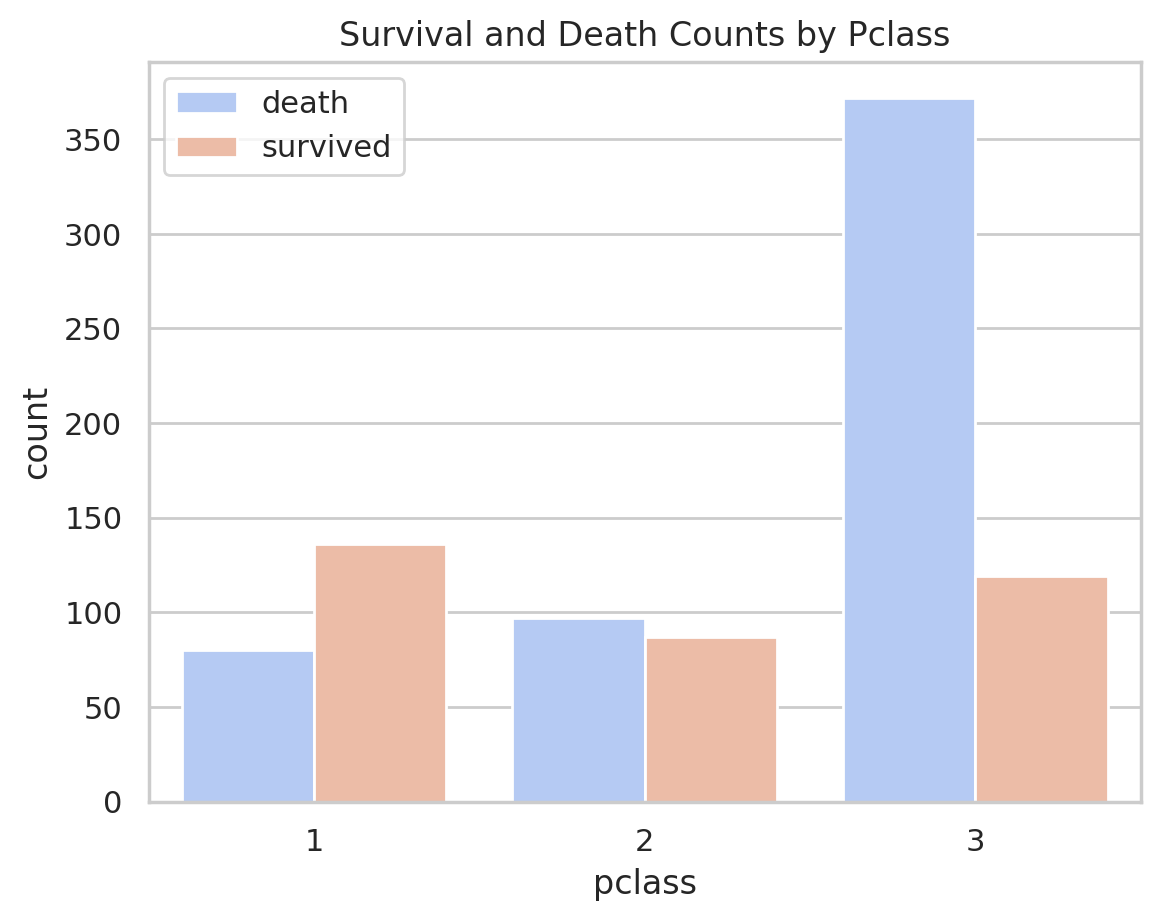

In [131]:
# 객실 등급 별 생존/사망 수

sns.countplot(x='pclass', hue='survived', data=ttn, palette='coolwarm')
plt.legend(labels=['death', 'survived'])
plt.title("Survival and Death Counts by Pclass")

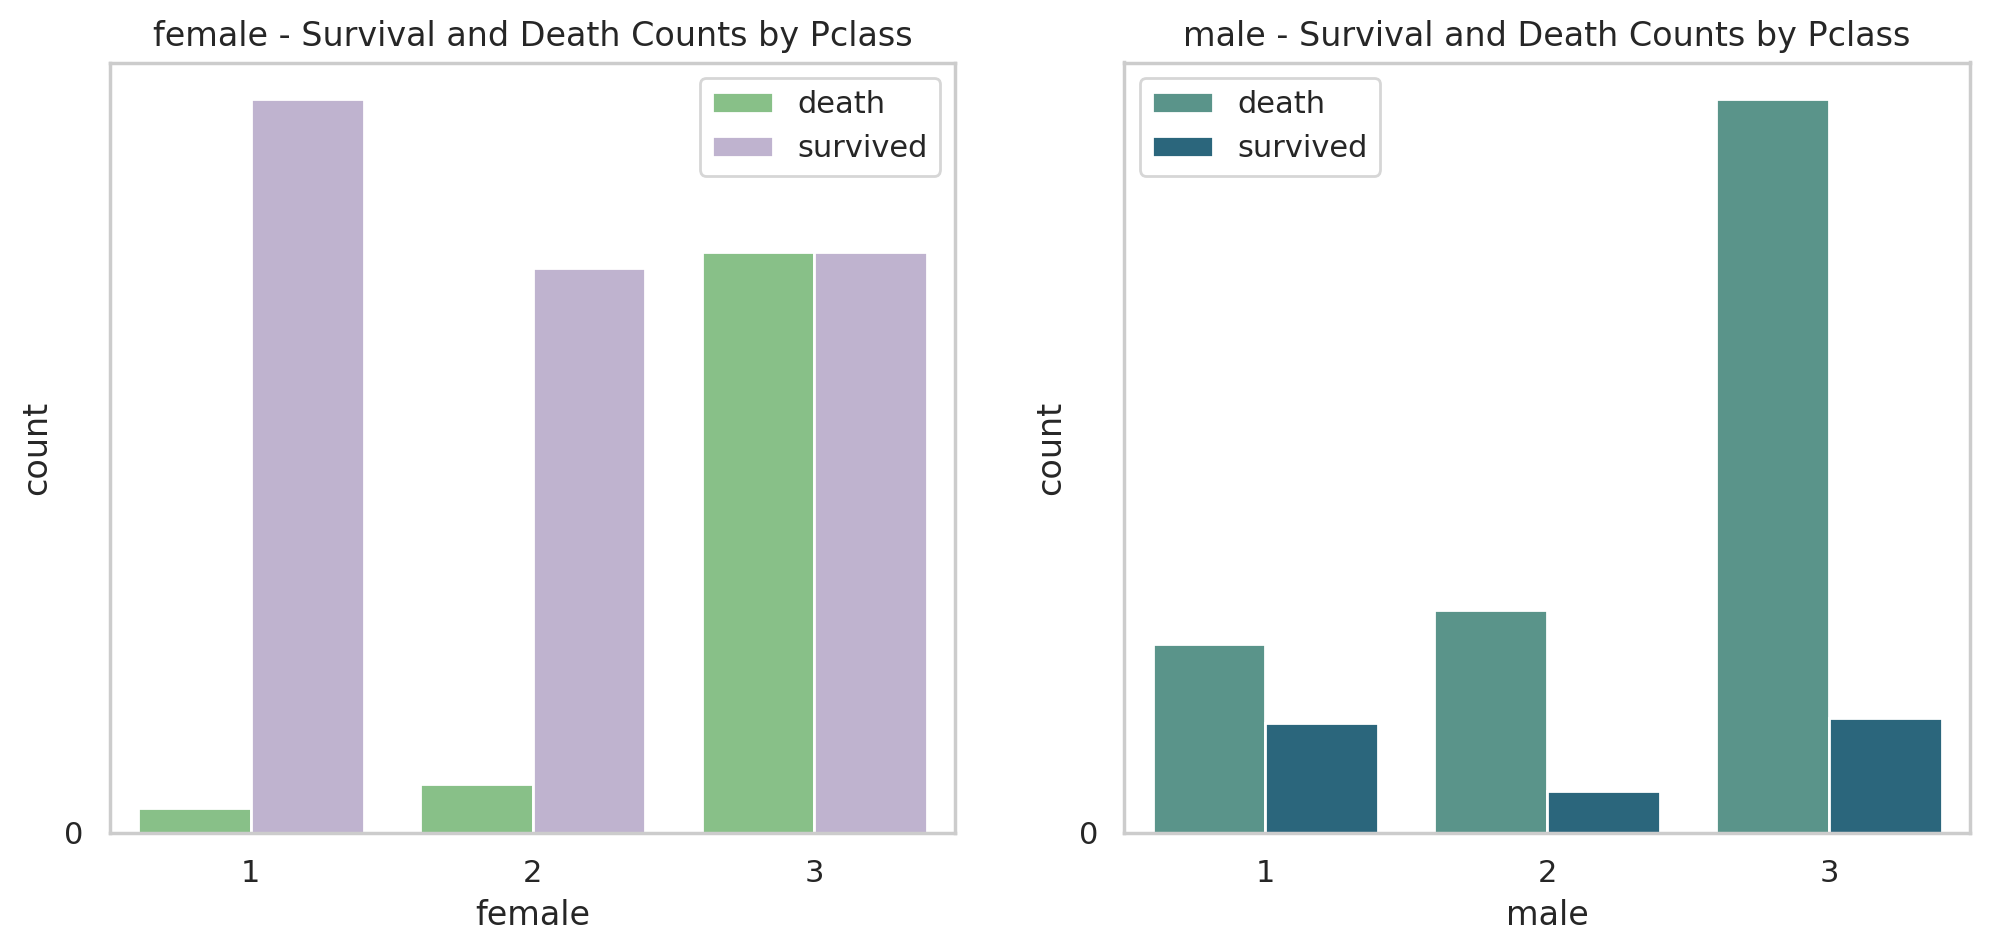

In [134]:
plt.figure(figsize=(12, 5))



# 여성 - 등급 별 사망/생존 수
plt.subplot(1, 2, 1)
sns.countplot(data=ttn[ttn['sex'] == 'female'], x = 'pclass', hue='survived', palette='Accent')
plt.yticks(np.arange(0, 500, 500))
plt.legend(labels=['death', 'survived'])
plt.xlabel("female")
plt.ylabel("count")
plt.title("female - Survival and Death Counts by Pclass")


# 남성 - 등급 별 사망/생존 수
plt.subplot(1, 2, 2)
sns.countplot(data=ttn[ttn['sex'] == 'male'], x = 'pclass', hue='survived', palette='crest')
plt.yticks(np.arange(0, 500, 500))
plt.legend(labels=['death', 'survived'])
plt.xlabel("male")
plt.ylabel("count")
plt.title("male - Survival and Death Counts by Pclass")


plt.show()

## 2️⃣ Embarked (탑승지)

| 값   | 의미          | 도시 이름 | 지역   |
| --- | ----------- | ----- | ---- |
| `S` | Southampton | 사우샘프턴 | 영국   |
| `C` | Cherbourg   | 셰르부르  | 프랑스  |
| `Q` | Queenstown  | 퀸스타운  | 아일랜드 |


Text(0.5, 1.0, 'Survival and Death Counts by Embarked')

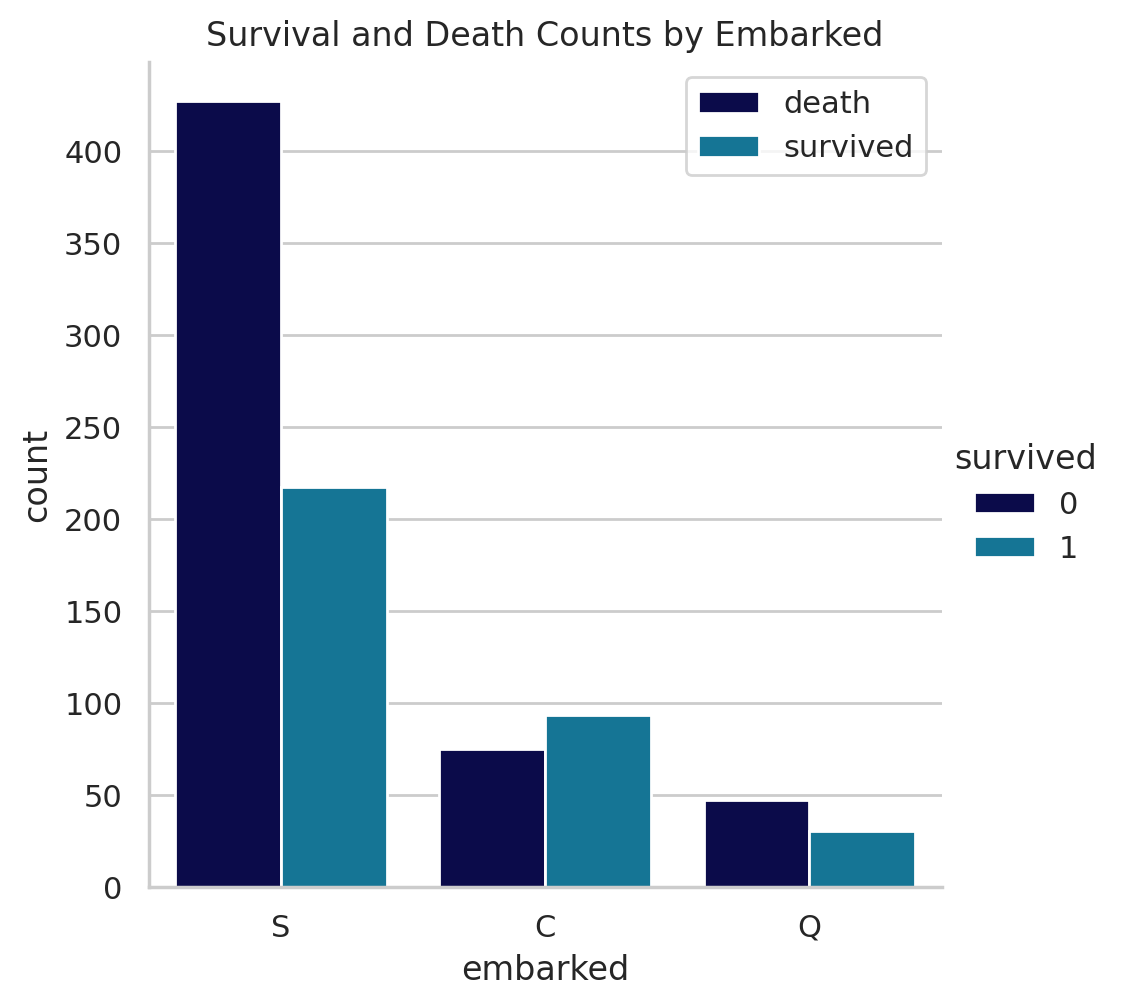

In [168]:
# 탑승지별 사망/생존 수

sns.catplot(x='embarked',hue ='survived', kind='count', data=ttn, palette='ocean')
plt.legend(labels=['death', 'survived'])
plt.title("Survival and Death Counts by Embarked")

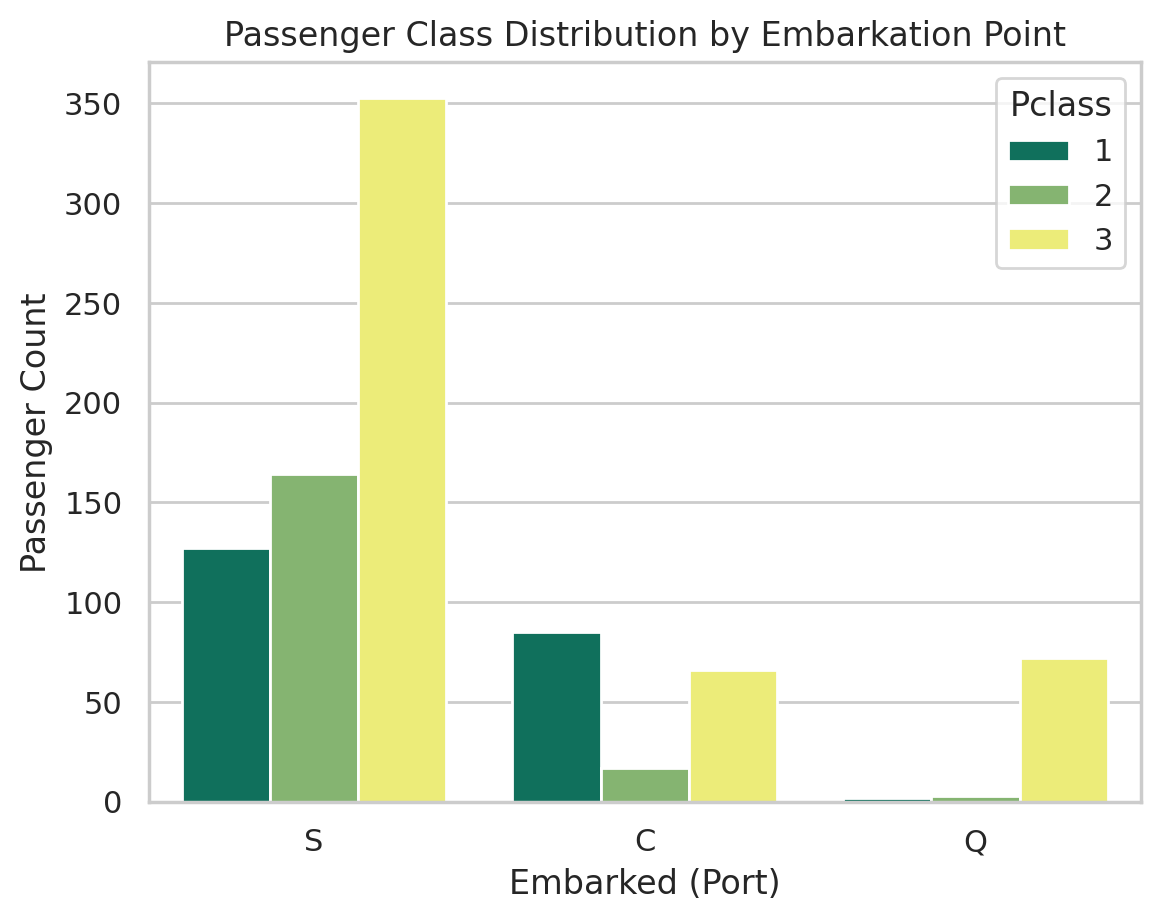

In [156]:
# 탑승지별 객실 등급 분포 (막대그래프)

sns.countplot(data=ttn, x='embarked', hue='pclass', palette='summer')
plt.title("Passenger Class Distribution by Embarkation Point")
plt.xlabel("Embarked (Port)")
plt.ylabel("Passenger Count")
plt.legend(title="Pclass")
plt.show()

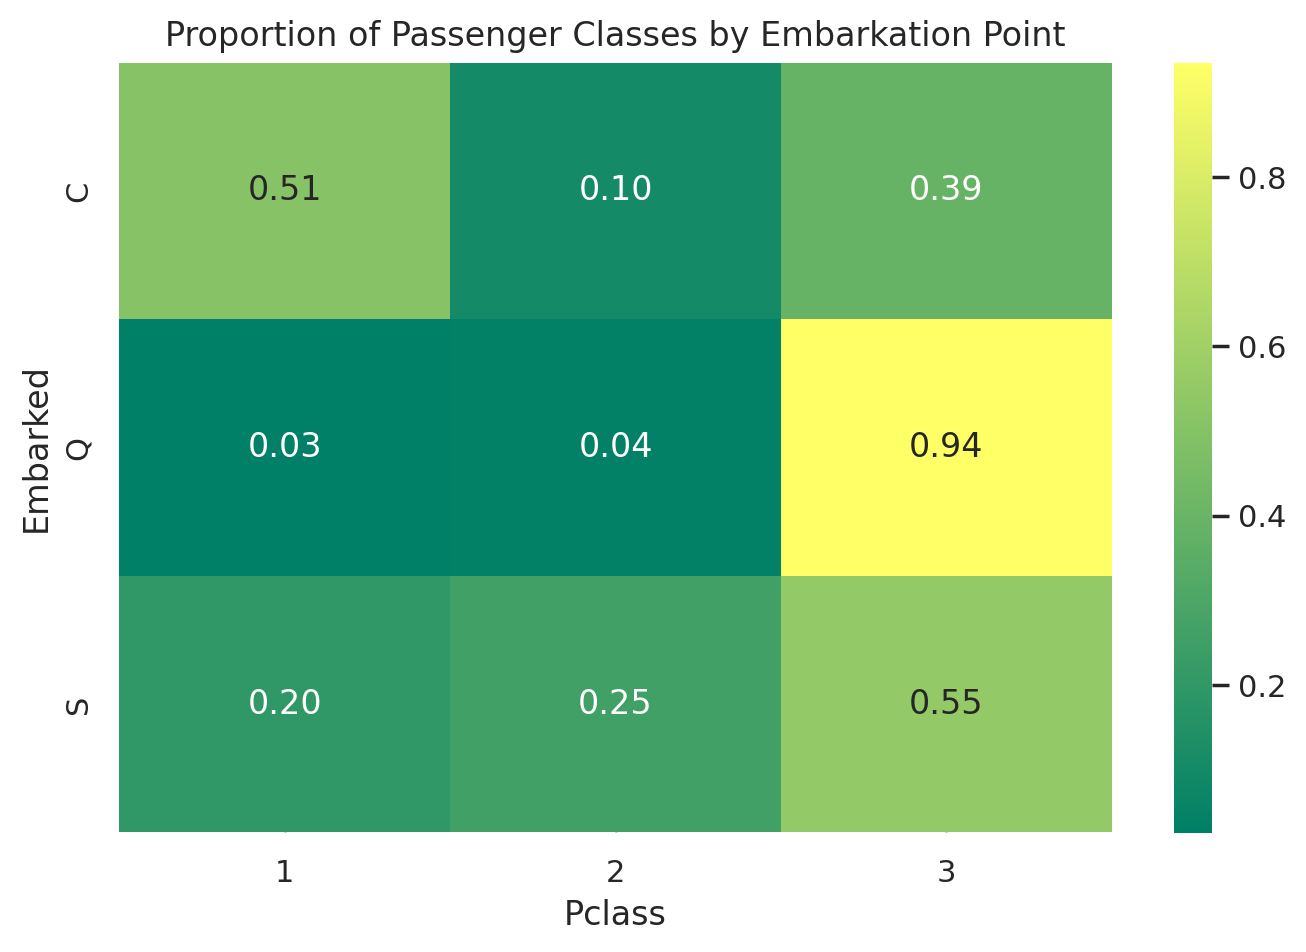

In [163]:
# 탑승지별 객실 등급 비율 (히트맵)

heat_data = pd.crosstab(ttn['embarked'], ttn['pclass'], normalize='index')  # index 기준 정규화
plt.figure(figsize=(8, 5))
sns.heatmap(heat_data, annot=True, fmt=".2f", cmap='summer')
plt.title("Proportion of Passenger Classes by Embarkation Point")
plt.xlabel("Pclass")
plt.ylabel("Embarked")
plt.show()

# = C 항구의 1등석 비율이 0.51로 가장 많았고, Q 항구의 3등석 비율이 0.94로 가장 많음

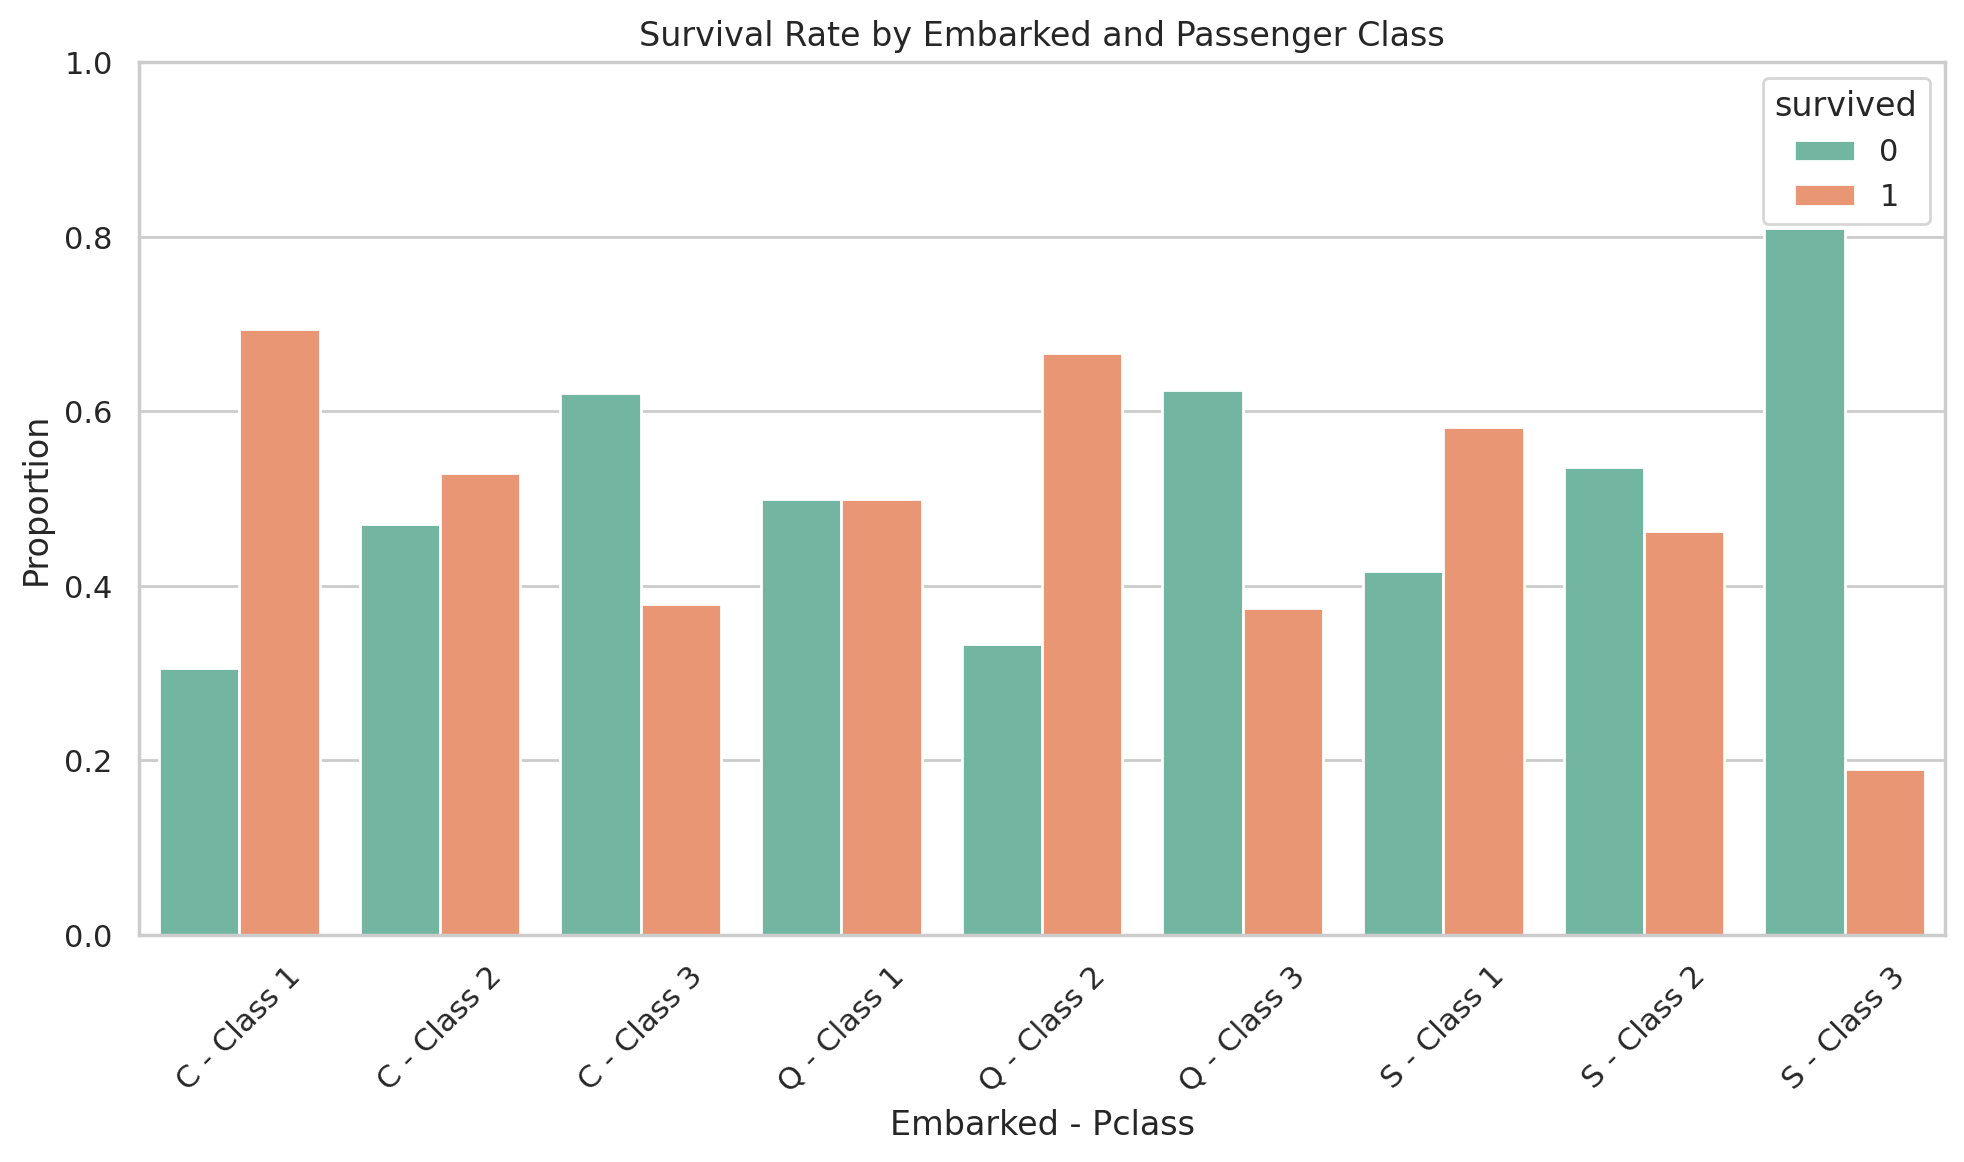

In [194]:
# 조합별 생존률 비율 계산
grouped = ttn.groupby(['embarked', 'pclass', 'survived']).size().reset_index(name='count')

# 각 (Embarked, Pclass) 조합 기준으로 정규화
grouped['percent'] = grouped.groupby(['embarked', 'pclass'])['count'].transform(lambda x: x / x.sum())

# x축 라벨 조합으로 묶기
grouped['label'] = grouped['embarked'].astype(str) + ' - Class ' + grouped['pclass'].astype(str)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='label', y='percent', hue='survived', palette='Set2')

plt.title("Survival Rate by Embarked and Passenger Class")
plt.ylabel("Proportion")
plt.xlabel("Embarked - Pclass")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title="survived")

plt.tight_layout()
plt.show()

<Axes: >

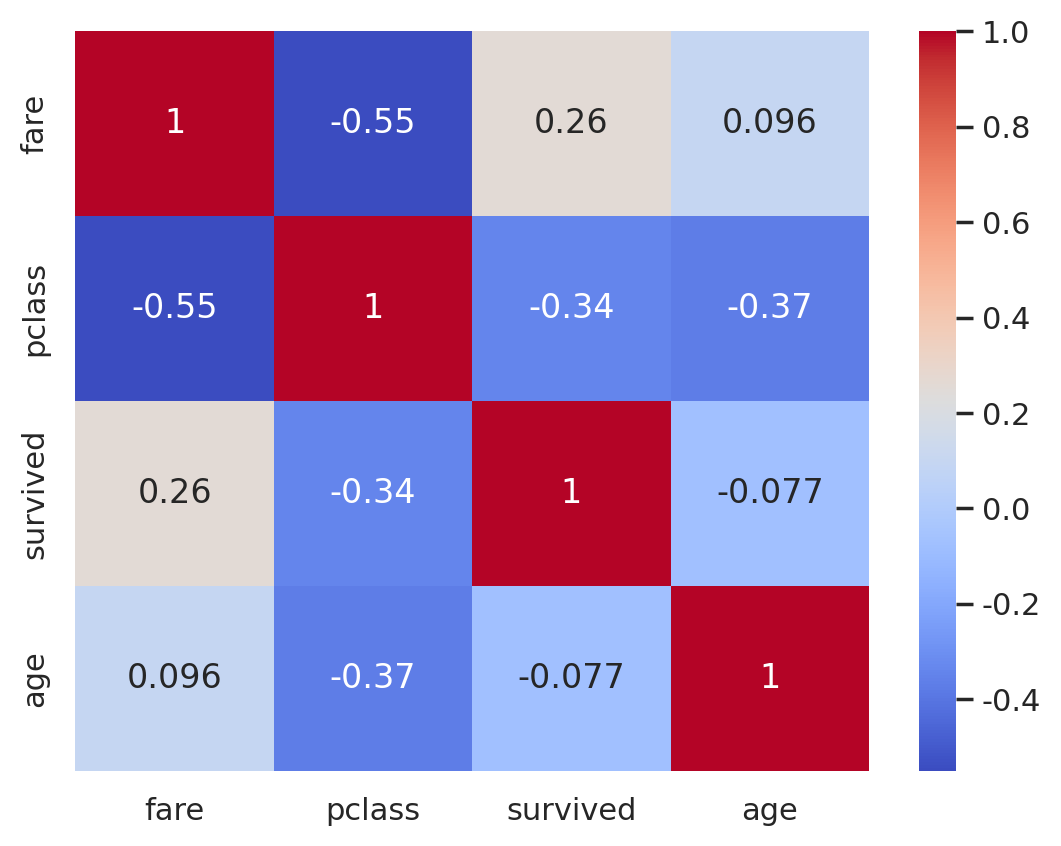

In [136]:
sns.heatmap(ttn[['fare', 'pclass', 'survived', 'age']].corr(), annot=True, cmap='coolwarm')